In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif



In [2]:
students = pd.read_csv('/kaggle/input/predict-students-dropout-and-academic-success/Predict Student Dropout and Academic Success.csv', delimiter=';')# /kaggle/input/predict-students-dropout-and-academic-success/Predict Student Dropout and Academic Success.csv
students.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [3]:
print(students.shape)
students.info()

(4424, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification        

In [4]:
students.isnull().sum().sort_values(ascending=False)
#no null values

Marital status                                    0
Age at enrollment                                 0
Curricular units 1st sem (credited)               0
Curricular units 1st sem (enrolled)               0
Curricular units 1st sem (evaluations)            0
Curricular units 1st sem (approved)               0
Curricular units 1st sem (grade)                  0
Curricular units 1st sem (without evaluations)    0
Curricular units 2nd sem (credited)               0
Curricular units 2nd sem (enrolled)               0
Curricular units 2nd sem (evaluations)            0
Curricular units 2nd sem (approved)               0
Curricular units 2nd sem (grade)                  0
Curricular units 2nd sem (without evaluations)    0
Unemployment rate                                 0
Inflation rate                                    0
GDP                                               0
International                                     0
Scholarship holder                                0
Application 

/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


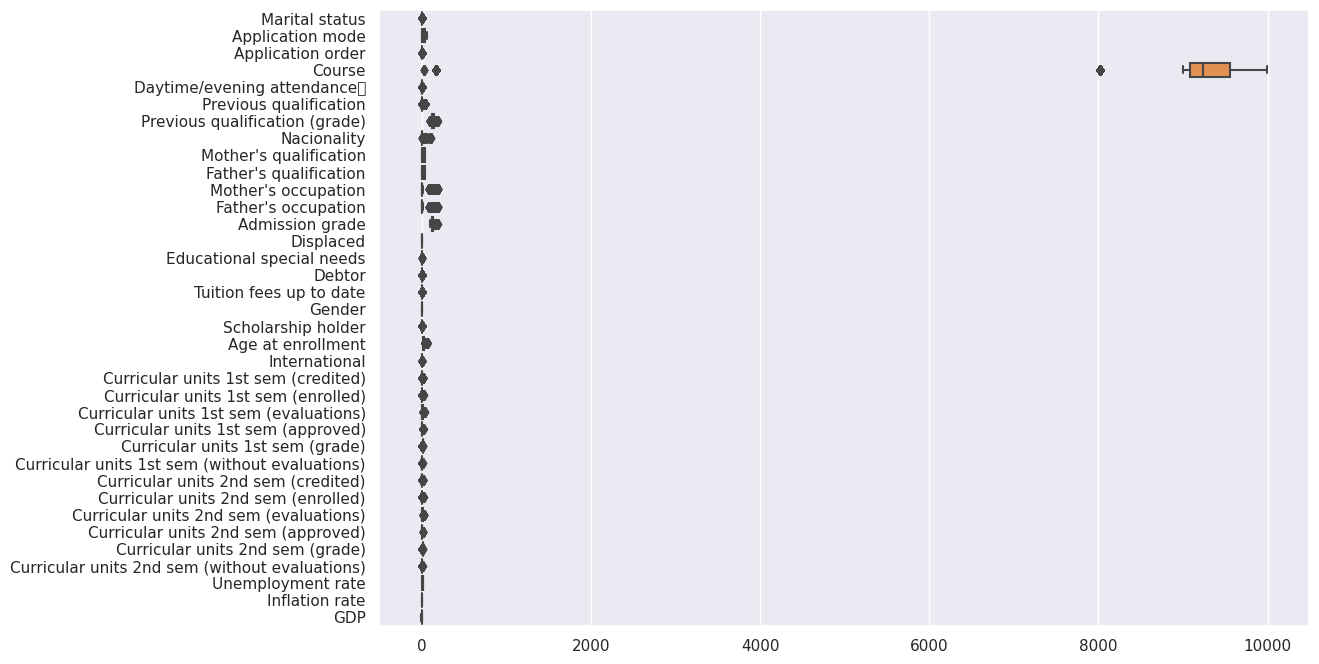

In [5]:
plt.figure(figsize=(12,8))
sns.set(style='darkgrid')
sns.boxplot(data=students, orient='h')
plt.show()
#no outliers in data

In [6]:
students['Target'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [7]:
from sklearn.preprocessing import LabelEncoder

le= LabelEncoder()
students['target_numeric']= le.fit_transform(students['Target'])
students= students.drop(columns=['Target'])
students.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,target_numeric
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2


In [8]:
#select 15 best features
features= students.drop(['target_numeric'], axis=1)
target_feature= students['target_numeric']

k_best= SelectKBest(score_func= f_classif,k=15)
X=k_best.fit_transform(features, target_feature)
y= target_feature

features_scores= k_best.scores_
feature_info= list(zip(features.columns, features_scores))
sorted_feature_info = sorted(feature_info, key=lambda x: x[1], reverse=True)

for feature_name, feature_score in sorted_feature_info[:15]:
    print(f"{feature_name}: {feature_score:.3f}")

Curricular units 2nd sem (approved): 1410.733
Curricular units 2nd sem (grade): 1134.110
Curricular units 1st sem (approved): 859.867
Curricular units 1st sem (grade): 713.517
Tuition fees up to date: 505.621
Scholarship holder: 225.751
Age at enrollment: 154.712
Debtor: 137.648
Gender: 123.042
Application mode: 114.535
Curricular units 2nd sem (evaluations): 87.801
Curricular units 2nd sem (enrolled): 75.592
Curricular units 1st sem (enrolled): 59.467
Curricular units 1st sem (evaluations): 37.528
Admission grade: 35.649


In [9]:
selected_features_indices = k_best.get_support(indices=True)
selected_features= features.iloc[:,selected_features_indices]
selected_features.head()

,Application mode,Admission grade,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade)
0,17,127.3,0,1,1,0,20,0,0,0,0.000000,0,0,0,0.000000
1,15,142.5,0,0,1,0,19,6,6,6,14.000000,6,6,6,13.666667
2,1,124.8,0,0,1,0,19,6,0,0,0.000000,6,0,0,0.000000
3,17,119.6,0,1,0,0,20,6,8,6,13.428571,6,10,5,12.400000
4,39,141.5,0,1,0,0,45,6,9,5,12.333333,6,6,6,13.000000


In [10]:
#split data
X_train, X_test, y_train, y_test= train_test_split(
    X, target_feature, test_size=0.2, random_state=42
)
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


Accuracy: 0.76


<Axes: >

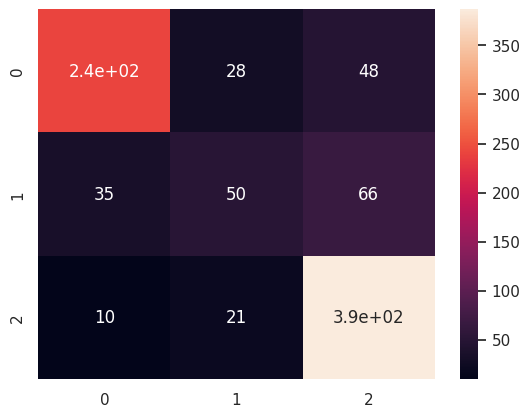

In [11]:
# from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

###not using GridSearchCV to determine most optimal hyperparameters due to
###random sampling while 'bagging'

# param_grid= {
#     'max_depth':[None, 10, 20 ,30],
#     'n_estimators':[50, 100, 150, 200],
# }
# grid_search = GridSearchCV(rf, param_grid, cv=5)
# grid_search.fit(X_train, y_train)
# print(f"Best params: {grid_search.best_params_}")

rf= RandomForestClassifier(max_depth= 20, n_estimators= 200)
rf.fit(X_train, y_train)

y_pred= rf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

Best Parameters: {'n_neighbors': 8}
Accuracy: 0.68


<Axes: >

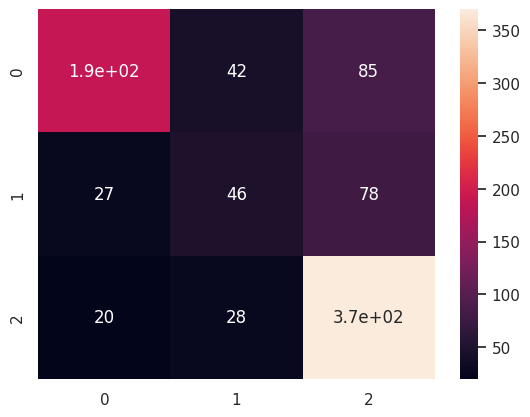

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn= KNeighborsClassifier()
params = {"n_neighbors": np.arange(1, 10)}

grid_search = GridSearchCV(knn, param_grid=params, cv=5)
grid_search.fit(X_train, y_train)
print(f"Best Parameters: {grid_search.best_params_}")

best_knn = grid_search.best_estimator_

y_pred = best_knn.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)